In [1]:
#importing libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading dataset
df=pd.read_csv('/Users/pamel/Downloads/pima_indians_diabetes.csv')

#creating a copy
data = df.copy()
print(data.shape)
data.describe().transpose()

(768, 9)


,count,mean,std,min,25%,50%,75%,max
gnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
diastolic,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
triceps,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
dpf,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
#checking for null values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gnancies   768 non-null    int64  
 1   glucose    768 non-null    int64  
 2   diastolic  768 non-null    int64  
 3   triceps    768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   dpf        768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Checking number of missing values 'zeros' for these columns
columns = ['gnancies','glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf',
       'age']
for i in columns:
    print("missing values in",i," :",(data[i] == 0).sum())

missing values in gnancies  : 111
missing values in glucose  : 5
missing values in diastolic  : 35
missing values in triceps  : 227
missing values in insulin  : 374
missing values in bmi  : 11
missing values in dpf  : 0
missing values in age  : 0


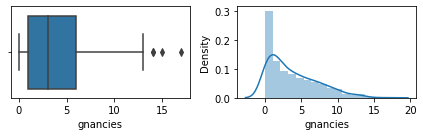

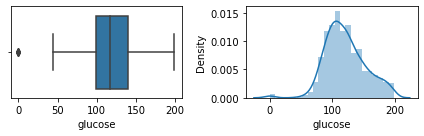

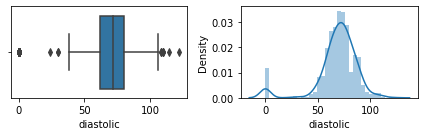

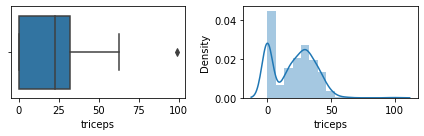

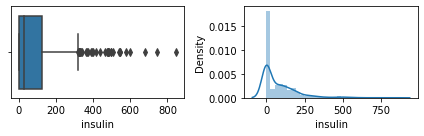

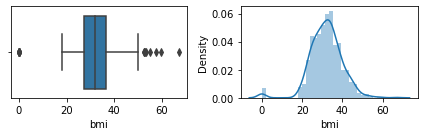

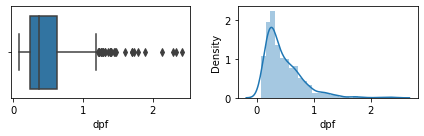

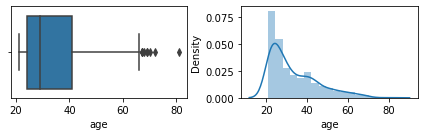

In [6]:
# Checking outliers and distribution of these columns for imputation
for i in columns:
    fig,axes = plt.subplots(1,2,figsize=(6,2))
    sns.boxplot(x=data[i],orient = 'v',ax = axes[0])
    sns.distplot(data[i],ax = axes[1])
    fig.tight_layout()

In [7]:
data.columns

Index(['gnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf',
       'age', 'diabetes'],
      dtype='object')

In [8]:
# removing some outliers
data = data[data['gnancies']<15]
data = data[data['triceps']<80]
data = data[data['insulin']<580]
data = data[data['bmi']<60]

print(data.shape)


(760, 9)


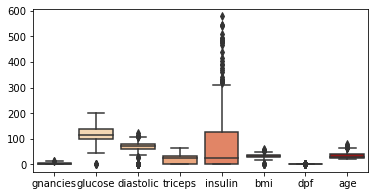

In [9]:
#checking for outliers

plt.figure(figsize = (6,3))
ax = sns.boxplot(data=data[['gnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf','age']],palette="OrRd", )


<Figure size 432x288 with 0 Axes>

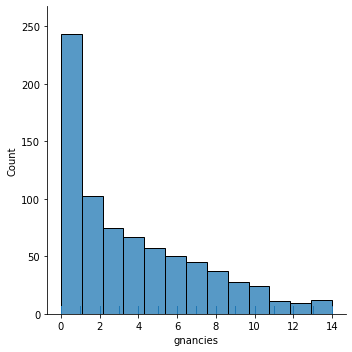

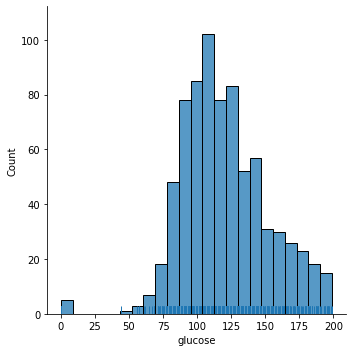

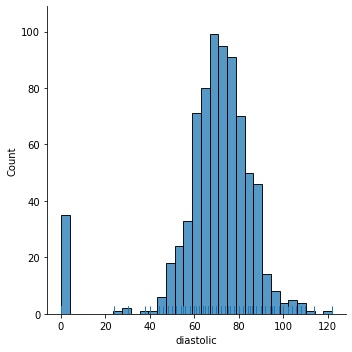

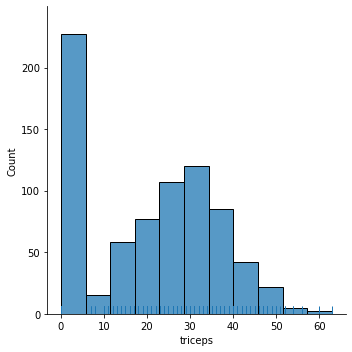

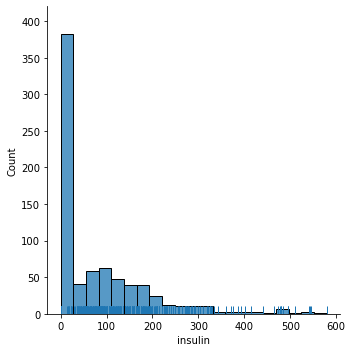

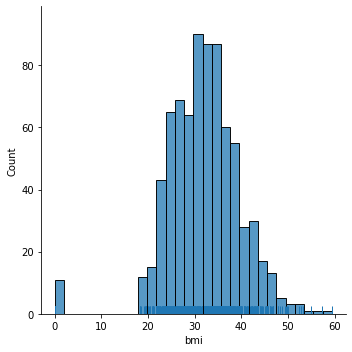

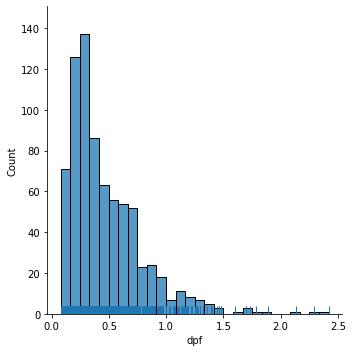

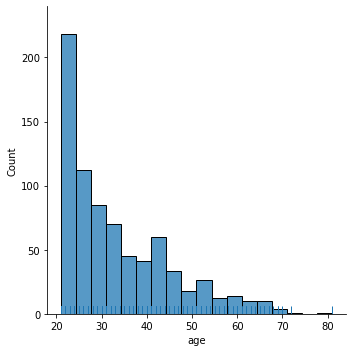

In [10]:
# analysing distribution of data again
for i,col in enumerate(data.columns[:-1]):
    
    plt.figure(i)
    sns.displot(data[col], rug=True)

In [11]:
data.columns

Index(['gnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf',
       'age', 'diabetes'],
      dtype='object')

In [12]:
#Identifying upper & lower limits outliers IQR method

def outlier_limits(col):
    Q3, Q1 = np.nanpercentile(col, [75,25])
    IQR = Q3 - Q1
    UL = Q3 + 1.5*IQR
    LL = Q1 - 1.5*IQR
    return UL, LL


In [13]:
#replacing outliers w/ null values 
for column in data:
    if data[column].dtype != 'object':
        UL, LL = outlier_limits(data[column])
        data[column] = np.where((data[column] > UL) | (data[column] < LL), np.nan, data[column])

<Figure size 576x288 with 0 Axes>

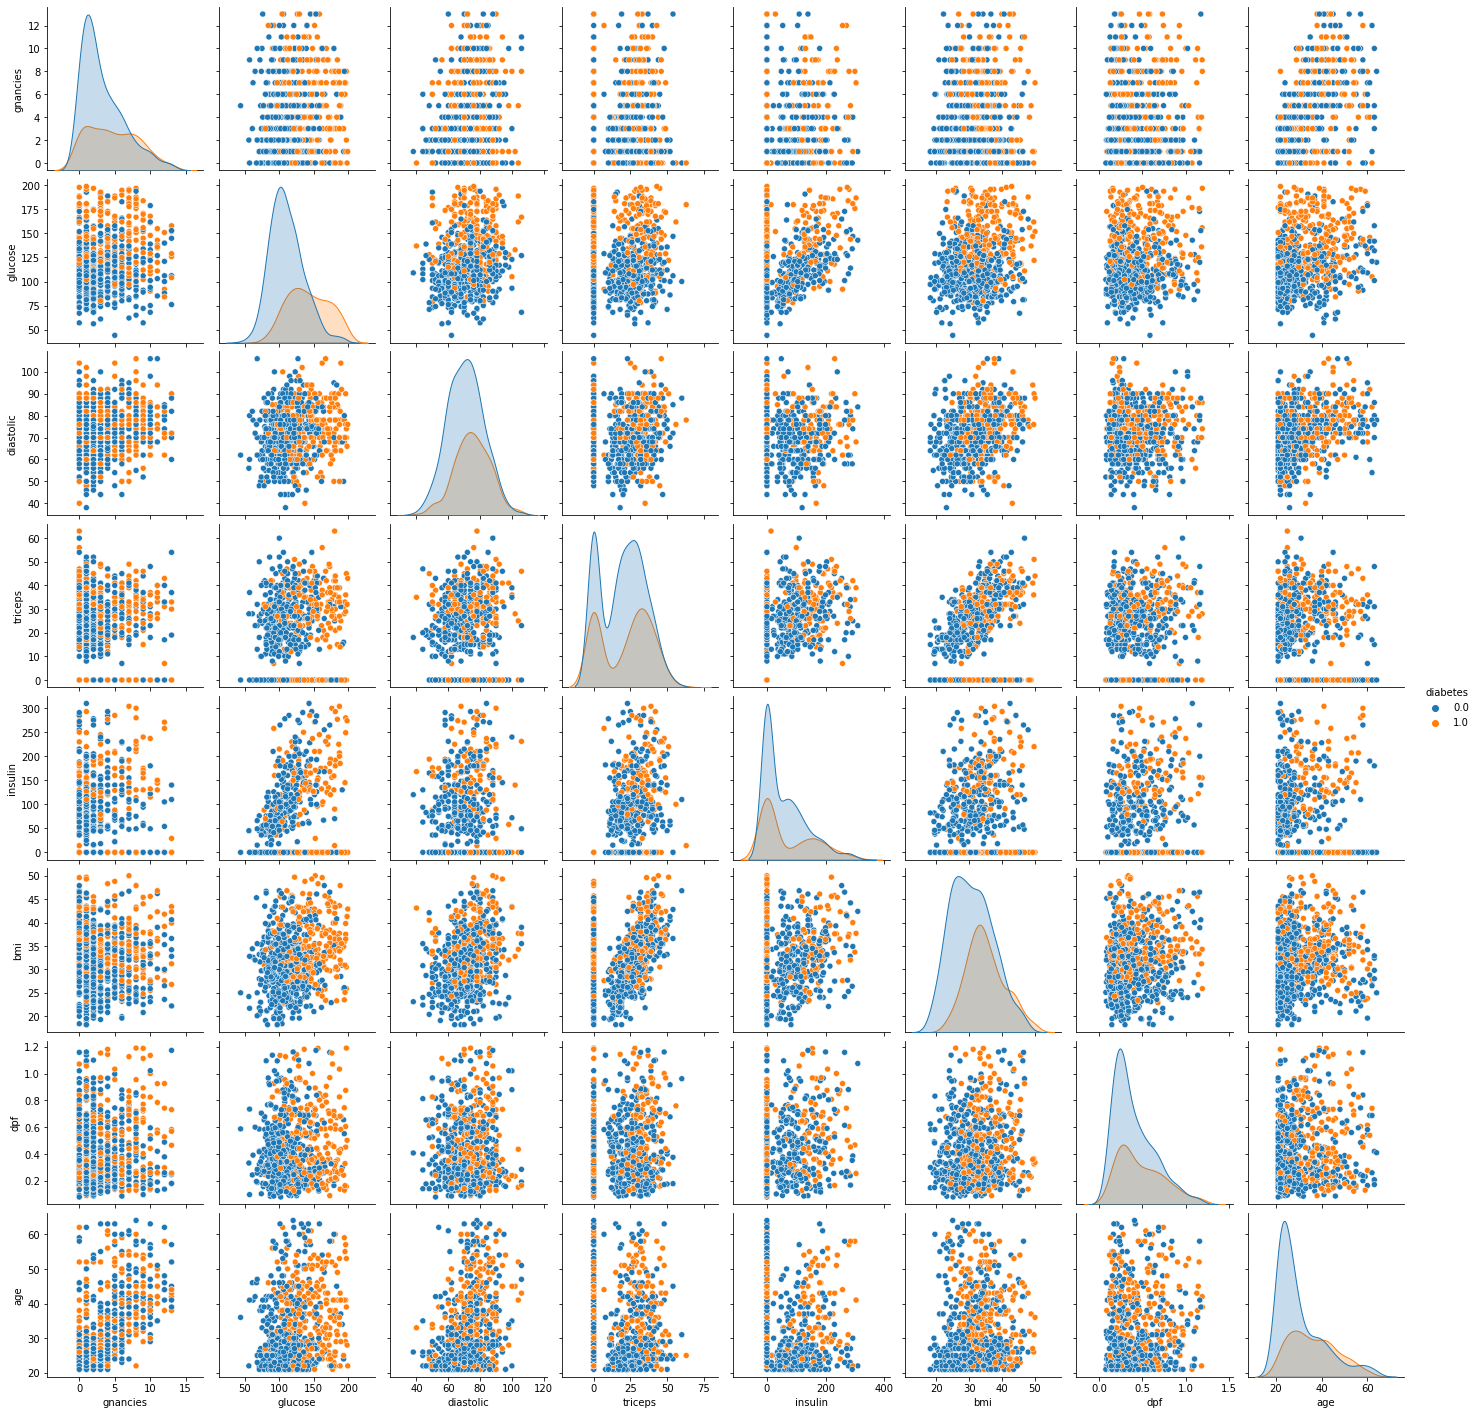

In [14]:
#checking the distribution 
plt.figure(figsize = (8,4))
sns.pairplot(data, hue = 'diabetes', vars = ['gnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf',
       'age'])

In [15]:
#counting number of Zero per column
(data [:] == 0).sum(axis=0)

gnancies     109
glucose        0
diastolic      0
triceps      227
insulin      373
bmi            0
dpf            0
age            0
diabetes     498
dtype: int64

In [16]:
#replacing zero with null values

data['triceps']=data['triceps'].replace(0, np.nan)
data['insulin']=data['insulin'].replace(0, np.nan)

In [17]:
#counting number of Zero per column
(data [:] == 0).sum(axis=0)

gnancies     109
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes     498
dtype: int64

In [18]:
#Checking % of null values all features
data.isnull().sum()

gnancies       2
glucose        5
diastolic     44
triceps      227
insulin      404
bmi           17
dpf           28
age           16
diabetes       0
dtype: int64

In [19]:
data.shape

(760, 9)

<AxesSubplot:>

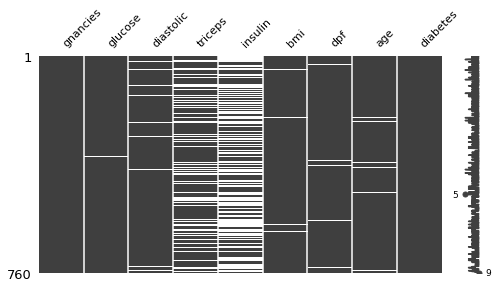

In [20]:
#Visualysing missing values in the data

import missingno as msno

msno.matrix(data.sample(760), figsize=(8, 4), fontsize=11)

In [21]:
#Copying data for outliers treatment purposes (trying KNN and Mean/median techinique)
data_knn = data.copy()

data_mm = data.copy()

In [22]:
#replacing null values with KNN techinique 

from fancyimpute import KNN, IterativeImputer

data_knn.isnull().sum()

gnancies       2
glucose        5
diastolic     44
triceps      227
insulin      404
bmi           17
dpf           28
age           16
diabetes       0
dtype: int64

In [23]:
#replacing null with KNN 

knn = KNN()
data_knn.iloc[:, :] = knn.fit_transform(data_knn)
data_knn.isnull().sum()

Imputing row 1/760 with 1 missing, elapsed time: 0.164
Imputing row 101/760 with 2 missing, elapsed time: 0.169
Imputing row 201/760 with 0 missing, elapsed time: 0.173
Imputing row 301/760 with 0 missing, elapsed time: 0.177
Imputing row 401/760 with 2 missing, elapsed time: 0.181
Imputing row 501/760 with 0 missing, elapsed time: 0.186
Imputing row 601/760 with 0 missing, elapsed time: 0.190
Imputing row 701/760 with 2 missing, elapsed time: 0.195


gnancies     0
glucose      0
diastolic    0
triceps      0
insulin      0
bmi          0
dpf          0
age          0
diabetes     0
dtype: int64

In [24]:
#replacing null values with Mean/median techinique 

data_mm.isnull().sum()

gnancies       2
glucose        5
diastolic     44
triceps      227
insulin      404
bmi           17
dpf           28
age           16
diabetes       0
dtype: int64

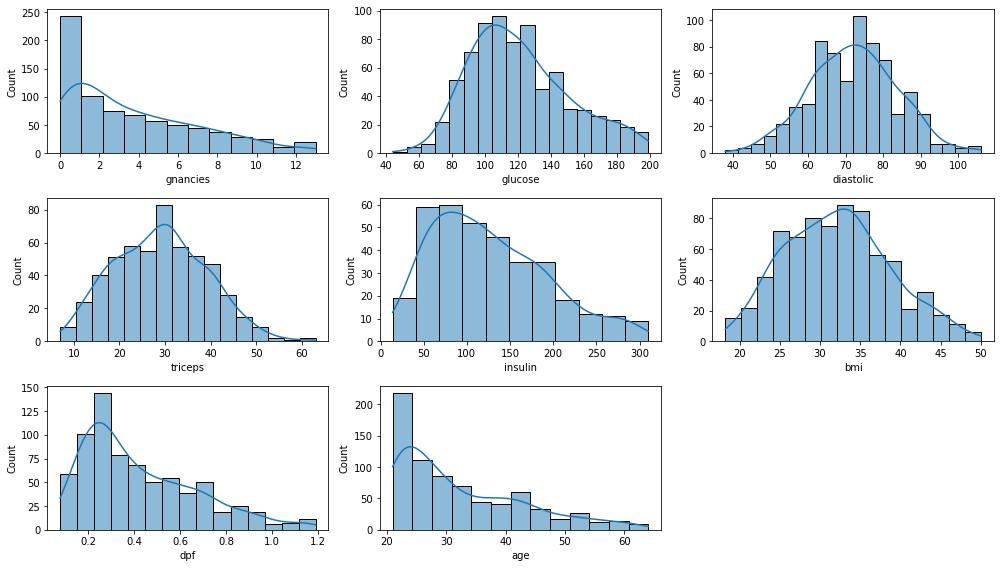

In [25]:
# Visually checking distribution before inputation mean/median

plt.figure(figsize=[14,8])
ax1 = plt.subplot(3,3,1)
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)
ax4 = plt.subplot(3,3,4)
ax5 = plt.subplot(3,3,5)
ax6 = plt.subplot(3,3,6)
ax7 = plt.subplot(3,3,7)
ax8 = plt.subplot(3,3,8)
sns.histplot(data= data, x='gnancies', kde=True, ax=ax1)
sns.histplot(data= data, x='glucose', kde=True, ax=ax2)
sns.histplot(data= data, x='diastolic', kde=True, ax=ax3)
sns.histplot(data= data, x='triceps', kde=True, ax=ax4)
sns.histplot(data= data, x='insulin', kde=True, ax=ax5)
sns.histplot(data= data, x='bmi', kde=True, ax=ax6)
sns.histplot(data= data, x='dpf', kde=True, ax=ax7)
sns.histplot(data= data, x='age', kde=True, ax=ax8)

plt.tight_layout()


In [26]:
#replacing null values with median/mean techinique - Blood pressure has almost normal distribution (mean) 
#others have a bit skewness therefore (median)

data_mm['gnancies'].fillna(data_mm['gnancies'].median(), inplace=True)
data_mm['glucose'].fillna(data_mm['glucose'].median(), inplace=True)
data_mm['diastolic'].fillna(data_mm['diastolic'].mean(), inplace=True)
data_mm['triceps'].fillna(data_mm['triceps'].median(), inplace=True)
data_mm['insulin'].fillna(data_mm['insulin'].mean(), inplace=True)
data_mm['bmi'].fillna(data_mm['bmi'].median(), inplace=True)
data_mm['dpf'].fillna(data_mm['dpf'].median(), inplace=True)
data_mm['age'].fillna(data_mm['age'].median(), inplace=True)

data_mm.isnull().sum()

gnancies     0
glucose      0
diastolic    0
triceps      0
insulin      0
bmi          0
dpf          0
age          0
diabetes     0
dtype: int64

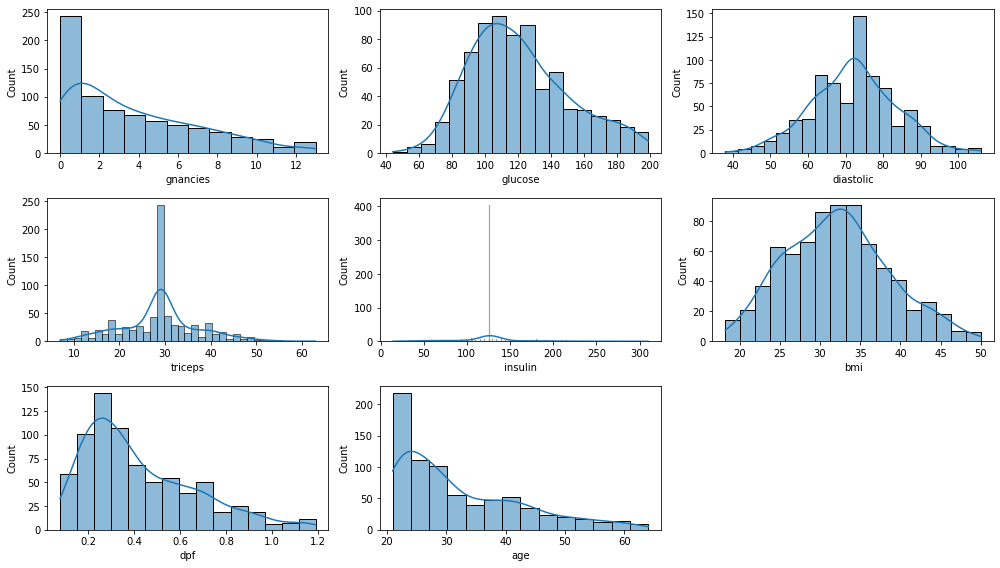

In [27]:
#distribution after mean/median inputation

plt.figure(figsize=[14,8])
ax1 = plt.subplot(3,3,1)
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)
ax4 = plt.subplot(3,3,4)
ax5 = plt.subplot(3,3,5)
ax6 = plt.subplot(3,3,6)
ax7 = plt.subplot(3,3,7)
ax8 = plt.subplot(3,3,8)
sns.histplot(data= data_mm, x='gnancies', kde=True, ax=ax1)
sns.histplot(data= data_mm, x='glucose', kde=True, ax=ax2)
sns.histplot(data= data_mm, x='diastolic', kde=True, ax=ax3)
sns.histplot(data= data_mm, x='triceps', kde=True, ax=ax4)
sns.histplot(data= data_mm, x='insulin', kde=True, ax=ax5)
sns.histplot(data= data_mm, x='bmi', kde=True, ax=ax6)
sns.histplot(data= data_mm, x='dpf', kde=True, ax=ax7)
sns.histplot(data= data_mm, x='age', kde=True, ax=ax8)

plt.tight_layout()

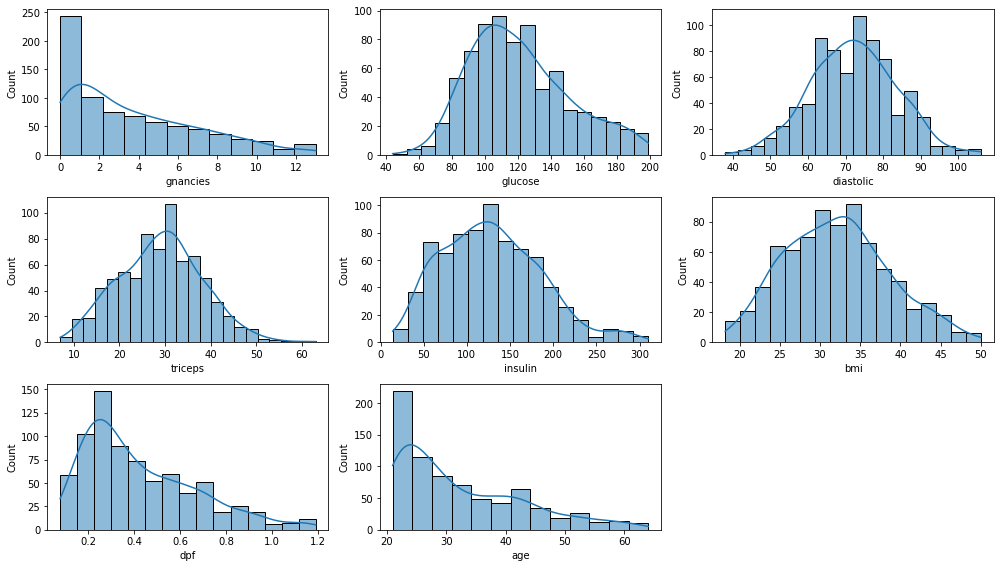

In [28]:
#distribution after knn inputation

plt.figure(figsize=[14,8])
ax1 = plt.subplot(3,3,1)
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)
ax4 = plt.subplot(3,3,4)
ax5 = plt.subplot(3,3,5)
ax6 = plt.subplot(3,3,6)
ax7 = plt.subplot(3,3,7)
ax8 = plt.subplot(3,3,8)
sns.histplot(data= data_knn, x='gnancies', kde=True, ax=ax1)
sns.histplot(data= data_knn, x='glucose', kde=True, ax=ax2)
sns.histplot(data= data_knn, x='diastolic', kde=True, ax=ax3)
sns.histplot(data= data_knn, x='triceps', kde=True, ax=ax4)
sns.histplot(data= data_knn, x='insulin', kde=True, ax=ax5)
sns.histplot(data= data_knn, x='bmi', kde=True, ax=ax6)
sns.histplot(data= data_knn, x='dpf', kde=True, ax=ax7)
sns.histplot(data= data_knn, x='age', kde=True, ax=ax8)

plt.tight_layout()

Text(0.5, 0, 'After outlier treatment')

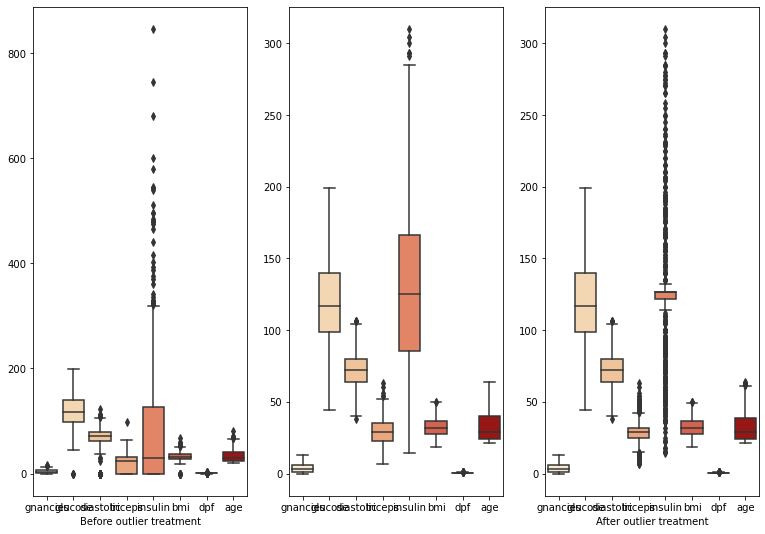

In [29]:
df =pd.read_csv('/Users/pamel/Downloads/pima_indians_diabetes.csv')

plt.figure(figsize = (13,9))

plt.subplot(1,3,1)
ax = sns.boxplot(data= df[['gnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf',
       'age',]],palette="OrRd", )

ax.set_xlabel('Before outlier treatment')

plt.subplot(1,3,2)
ax = sns.boxplot(data= data_knn[['gnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf',
       'age',]],palette="OrRd", )

plt.subplot(1,3,3)
ax = sns.boxplot(data= data_mm[['gnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf',
       'age',]],palette="OrRd", )


ax.set_xlabel('After outlier treatment')

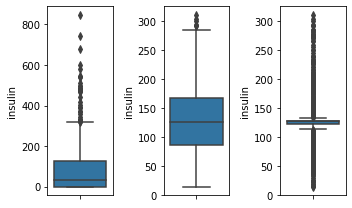

In [30]:
#comparying outlier treatments (insulin feature)

plt.figure(figsize = (5, 3))
plt.subplot(1,3,1)
sns.boxplot(y = df.iloc[:,4])


plt.subplot(1,3,2)
sns.boxplot(y = data_knn.iloc[:,4])

plt.subplot(1,3,3)
sns.boxplot(y = data_mm.iloc[:,4])


plt.tight_layout()

Text(0.5, 0, 'Before outlier treatment')

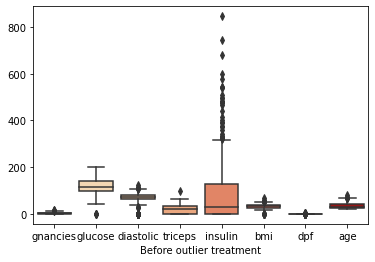

In [31]:
plt.figure(figsize = (6,4))
ax = sns.boxplot(data=df[['gnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf','age']],palette="OrRd", )

ax.set_xlabel('Before outlier treatment') 

Text(0.5, 0, 'After outlier treatment')

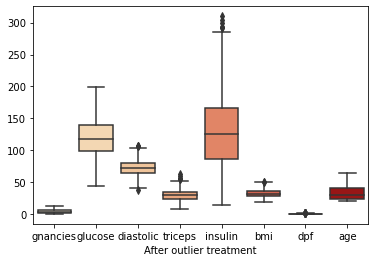

In [32]:
plt.figure(figsize = (6,4))
ax = sns.boxplot(data=data_knn[['gnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf','age']],palette="OrRd", )

ax.set_xlabel('After outlier treatment') 

In [33]:
#statistical summary cleaned data

data_knn.describe()

,gnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,3.798508,121.158004,72.195078,29.078178,128.352992,32.147418,0.428302,32.477413,0.344737
std,3.276105,30.262776,11.334119,9.126487,57.226094,6.463562,0.246477,10.572799,0.475595
min,0.000000,44.000000,38.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,85.505185,27.400000,0.239750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.240858,125.000000,32.000000,0.356000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,35.000000,166.167956,36.300000,0.583000,40.000000,1.000000
max,13.000000,199.000000,106.000000,63.000000,310.000000,50.000000,1.191000,64.000000,1.000000


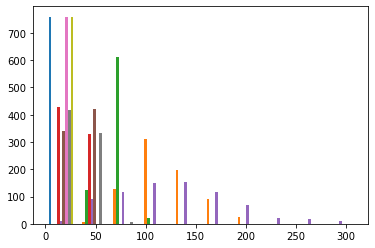

In [34]:
plt.figure(figsize = (6,4))
plt.hist(data_knn[:-1])
plt.show()

In [35]:
#copying cleanning data

dataset = data_knn.copy()

In [36]:
#checking correlation 

correlation_matrix = dataset.corr()
correlation_matrix["diabetes"]

gnancies     0.208572
glucose      0.499078
diastolic    0.182029
triceps      0.280147
insulin      0.363315
bmi          0.301924
dpf          0.155101
age          0.269739
diabetes     1.000000
Name: diabetes, dtype: float64

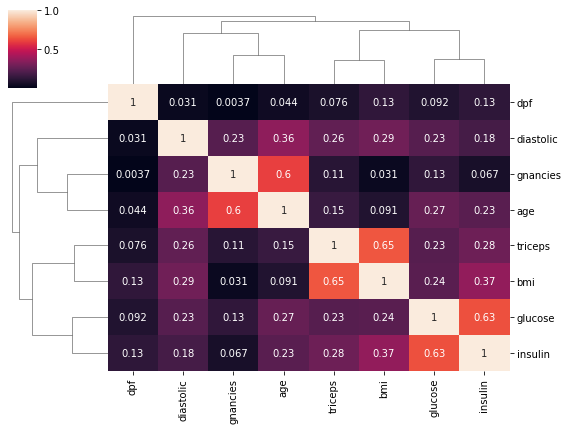

In [37]:
# Analysis of Correlations - Positive Correlations pair (Glucose vs Insulin)-(BMI vs Skin Thickness) - (Pregnancies vs Age)

Corr = dataset.drop(['diabetes'], axis =1).corr()
sns.clustermap(Corr, annot=True, figsize=(8, 6))

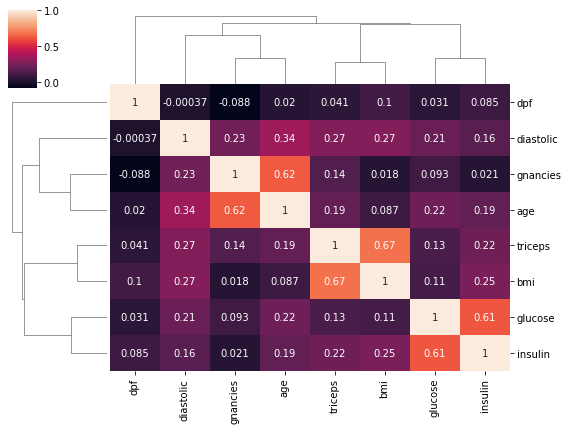

In [38]:
#checking correlation changes between Diabetese vs non diabetes

data_non = dataset.loc[dataset.diabetes == 0,:]
Corr_non = data_non.drop(['diabetes'], axis =1).corr()
sns.clustermap(Corr_non, annot=True, figsize=(8, 6))

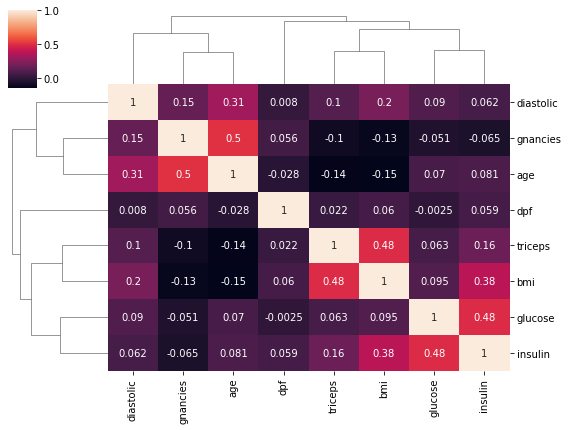

In [39]:
#checking correlation changes between Diabetese vs non diabetes
data_non = dataset.loc[dataset.diabetes == 1,:]
Corr_non = data_non.drop(['diabetes'], axis =1).corr()
sns.clustermap(Corr_non, annot=True, figsize=(8, 6))

<AxesSubplot:xlabel='glucose', ylabel='insulin'>

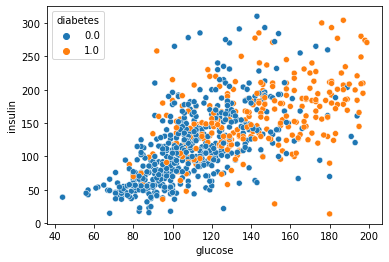

In [40]:
#correlation between Glucose vs insulin (target)
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'glucose', y = 'insulin', hue = 'diabetes', data = dataset)

<AxesSubplot:xlabel='triceps', ylabel='bmi'>

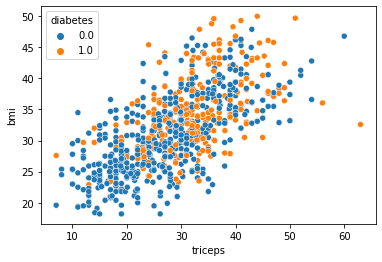

In [41]:
#correlation between triceps vs bmi (target)
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'triceps', y = 'bmi', hue = 'diabetes', data = dataset)

Negative (0):  498
Positive (1):  262


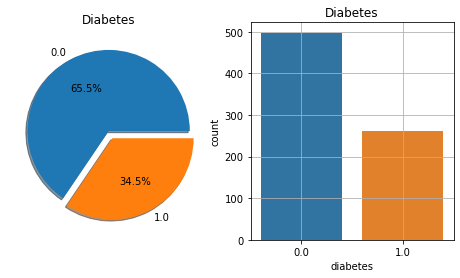

In [42]:
# Investigating the distribution of class (diabetes)
#Count of diabetes - 'imbalanced data'

f, ax = plt.subplots(1,2,figsize=(8,4))
dataset['diabetes'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%' , ax=ax[0], shadow=True)
ax[0].set_title('Diabetes')
ax[0].set_ylabel('')

sns.countplot('diabetes', data=dataset, ax=ax[1])
ax[1].set_title('Diabetes')
N,P = dataset['diabetes'].value_counts()
print('Negative (0): ', N)
print('Positive (1): ', P)
plt.grid()
plt.show()


In [43]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [44]:
#Feature selection w/ decision tree

from sklearn.tree import DecisionTreeClassifier

seed = 7

dt = DecisionTreeClassifier(random_state=seed, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=7)

In [45]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(data.drop('diabetes', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for gnancies is : 0.052455444663482925
The feature importance for glucose is : 0.2745079606463262
The feature importance for diastolic is : 0.04250782699848897
The feature importance for triceps is : 0.10422982772097988
The feature importance for insulin is : 0.12860710234848238
The feature importance for bmi is : 0.18720670188898705
The feature importance for dpf is : 0.10732224722731196
The feature importance for age is : 0.10316288850594053


In [46]:
# Creating a dataframe for columns to keep in the model 
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:4]

fi_df

,index,Feature,Feature Importance
0,1,glucose,0.274508
1,5,bmi,0.187207
2,4,insulin,0.128607
3,6,dpf,0.107322
4,3,triceps,0.104230
5,7,age,0.103163
6,0,gnancies,0.052455
7,2,diastolic,0.042508


In [47]:
columns_to_keep

0    glucose
1        bmi
2    insulin
3        dpf
Name: Feature, dtype: object

In [48]:
# checking the shapes

print(dataset.shape)
print(dataset[columns_to_keep].shape)

# new data = dataset[columns_to_keep]

(760, 9)
(760, 4)


In [49]:
#Spliting data vertically into X and y (most important features selected)

X = dataset[columns_to_keep].values

y = dataset['diabetes']


print(X.shape)
print(y.shape)


(760, 4)
(760,)


In [50]:
#Applying Smote techinique to solve imbalanced data issue

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=seed)


X =  dataset[columns_to_keep].values
y = dataset[['diabetes']]


X, y = smote.fit_resample(X,y)

In [51]:
#Splitting the dataset into the Training set and Test set 

#from sklearn.model_selection import train_test_split#split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1245, stratify=y)


In [52]:
#Splitting the dataset into the Training set and Test set 
# Hold-out validation method - training and testing datasets

from sklearn.model_selection import train_test_split # to split data into train and test sets

#first one test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, test_size=0.30, random_state=seed, stratify=y)


print(X_train.shape)
print(X_test.shape)


print(y_train.shape)
print(y_test.shape)

(697, 4)
(299, 4)
(697, 1)
(299, 1)


In [53]:
#Feature Scaling - after spliting dataset to avoid data leakage
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


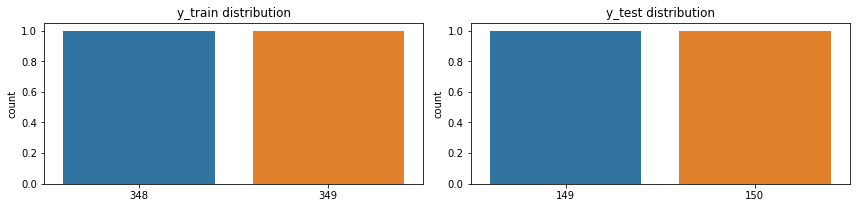

In [54]:
# Investigating the distr of target (to check if we have balanced the data)

plt.rcParams["figure.figsize"] = (12,8)

plt.subplot(3,2,1)
plt.title('y_train distribution')
ax = sns.countplot(x = y_train.value_counts())

plt.subplot(3,2,2)
plt.title('y_test distribution')
ax = sns.countplot(x = y_test.value_counts())


plt.tight_layout()

In [55]:

y_test.value_counts()

diabetes
1.0         150
0.0         149
dtype: int64

In [56]:
#Libraries for classifiers

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np



In [57]:
#Training classifiers (building the models)

seed = 1245

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

log_model = LogisticRegression(random_state=seed)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

rfc_model = RandomForestClassifier(random_state=seed)
rfc_model.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

svc_model = SVC(probability=True, random_state=seed)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

In [58]:
#Evaluating the Models 
knn_score = accuracy_score(y_test, y_pred_knn)
knn_precision = metrics.precision_score(y_test, y_pred_knn)
knn_recall = metrics.recall_score(y_test, y_pred_knn)
prob_knn = knn_model.predict_proba(X_test)[:,1]

log_score = accuracy_score(y_test, y_pred_log)
log_precision = metrics.precision_score(y_test, y_pred_log)
log_recall = metrics.recall_score(y_test, y_pred_log)
prob_log = log_model.predict_proba(X_test)[:,1]

rfc_score = accuracy_score(y_test, y_pred_rfc)
rfc_precision = metrics.precision_score(y_test, y_pred_rfc)
rfc_recall = metrics.recall_score(y_test, y_pred_rfc)
prob_rfc = rfc_model.predict_proba(X_test)[:,1]

svc_score = accuracy_score(y_test, y_pred_svc)
svc_precision = metrics.precision_score(y_test, y_pred_svc)
svc_recall = metrics.recall_score(y_test, y_pred_svc)
prob_svc = svc_model.predict_proba(X_test)[:,1]


print("Accuracy score (KNeighbors Classifier): ", knn_score)
print("Accuracy precision (KNeighbors Classifier): ", knn_precision)
print("Accuracy recall (KNeighbors Classifier): ", knn_recall, '\n ')

print("Accuracy score (Logistic Regression): ", log_score)
print("Accuracy precision (Logistic Regression): ", log_precision)
print("Accuracy recall (Logistic Regression): ", log_recall, '\n ')

print("Accuracy score (Random Forest Classifier ): ", rfc_score)
print("Accuracy precision (Random Forest Classifier): ", rfc_precision)
print("Accuracy recall (Random Forest Classifier): ", rfc_recall, '\n ')


print("Accuracy score (Support Vector Machine): ", svc_score)
print("Accuracy precision (Support Vector Machine): ", svc_precision)
print("Accuracy recall (Support Vector Machine): ", svc_recall, '\n ')


Accuracy score (KNeighbors Classifier):  0.7692307692307693
Accuracy precision (KNeighbors Classifier):  0.7547169811320755
Accuracy recall (KNeighbors Classifier):  0.8 
 
Accuracy score (Logistic Regression):  0.7224080267558528
Accuracy precision (Logistic Regression):  0.7637795275590551
Accuracy recall (Logistic Regression):  0.6466666666666666 
 
Accuracy score (Random Forest Classifier ):  0.8093645484949833
Accuracy precision (Random Forest Classifier):  0.7852760736196319
Accuracy recall (Random Forest Classifier):  0.8533333333333334 
 
Accuracy score (Support Vector Machine):  0.7391304347826086
Accuracy precision (Support Vector Machine):  0.75
Accuracy recall (Support Vector Machine):  0.72 
 


In [59]:
# K-fold method
cv_models = []

knn_modelcv = cv_models.append(("K-Nearest Neighbour (K-fold):",KNeighborsClassifier()))
rf_modelcv = cv_models.append(("Logistic Regression (K-fold):",LogisticRegression(random_state=seed)))
log_modelcv = cv_models.append(("Random Forest:(K-fold)",RandomForestClassifier(random_state=seed)))
svc_modelcv = cv_models.append(("Support Vector Machine (K-fold):",SVC(probability=True,random_state=seed)))

results = []
names = []

for name,model in cv_models:
    kfold = StratifiedKFold(n_splits=5)
    cv7_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv7_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)
    

K-Nearest Neighbour (K-fold): 75.60226104830421
Logistic Regression (K-fold): 72.15724563206577
Random Forest:(K-fold) 78.1891058581706
Support Vector Machine (K-fold): 75.73895169578624


In [60]:
# Voting Classifier hold out method - Testing Hard and Soft aproach
from sklearn.ensemble import VotingClassifier


#Hard voting classifier
estimators = [('knn_model', KNeighborsClassifier()), 
              ('rf_model', RandomForestClassifier(random_state=seed)), 
              ('log_model', LogisticRegression(random_state=seed)), 
              ('svc_model', SVC(probability=True, random_state=seed))]

#create our voting classifier, inputting our models

ensemble1 = VotingClassifier(estimators, voting = "hard")

#fit model to training data
ensemble1.fit(X_train, y_train)
#test our model on the test data
hard_model = ensemble1.score(X_test, y_test)

#Soft voting classifier
estimators1 = [('knn_model', KNeighborsClassifier()), 
              ('rf_model', RandomForestClassifier(random_state=seed)), 
              ('log_model', LogisticRegression(random_state=seed)), 
              ('svc_model', SVC(probability=True, random_state=seed))]

#create our voting classifier, inputting our models

ensemble2 = VotingClassifier(estimators1, voting = "soft")

#fit model to training data
ensemble2.fit(X_train, y_train)
#test our model on the test data
soft_model = ensemble2.score(X_test, y_test)


print("Hold-out - Hard Voting Classifier Accuracy: {:.2f} %".format(hard_model))
print("Hold-out - Soft Voting Classifier Accuracy: {:.2f} %".format(soft_model))

Hold-out - Hard Voting Classifier Accuracy: 0.75 %
Hold-out - Soft Voting Classifier Accuracy: 0.78 %


In [61]:
#Voting Classifier k-fold method (hard-soft aproaches)
kfold = StratifiedKFold(n_splits=5)

# create the sub models
k_estimators5 = []

knn_modelcv = KNeighborsClassifier()
k_estimators5.append(('knn_cv', knn_modelcv))
rf_modelcv = RandomForestClassifier(random_state=seed)
k_estimators5.append(('rf_cv', rf_modelcv))
log_modelcv = LogisticRegression()
k_estimators5.append(('log_cv', log_modelcv))
svc_modelcv = SVC(probability=True, random_state=seed)
k_estimators5.append(('svc_cv', svc_modelcv))

k_estimators5

# create the ensemble model
ensemble11 = VotingClassifier(k_estimators5, voting='hard')
results7 = cross_val_score(ensemble11, X_train, y_train, cv=kfold, scoring='accuracy')
results7 = results7.mean()

ensemble12 = VotingClassifier(k_estimators5, voting='soft')
results8 = cross_val_score(ensemble12, X_train, y_train, cv=kfold, scoring='accuracy')
results8 = results8.mean()

print("K-fold hard Voting Classifier Accuracy: {:.2f} %".format(results7))
print("K-fold soft Voting Classifier Accuracy: {:.2f} %".format(results8))

K-fold hard Voting Classifier Accuracy: 0.76 %
K-fold soft Voting Classifier Accuracy: 0.77 %


In [62]:
#Applying Grid Search to find the best model and the best parameters (holdout)

#KNN 
params_knn = {'n_neighbors': np.arange(1, 25), 'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan', 'minkowski']}

knn_gs = GridSearchCV(knn_model, params_knn, cv = 5)
knn_gs.fit(X_train, y_train)
knn_accuracy = knn_gs.best_score_
knn_best = knn_gs.best_estimator_
knn_bestpred = knn_gs.predict(X_test)

#Logistic Regression
params_log = {'C': [0.01, 0.1, 0.5, 1, 2, 5, 1, 2, 5, 10],
              'penalty': ['l2'],
              'solver': ['linear', 'lbfgs', 'saga']}

log_gs = GridSearchCV(log_model, params_log, cv = 5)
log_gs.fit(X_train, y_train)
log_accuracy = log_gs.best_score_
log_best = log_gs.best_estimator_
log_bestpred = log_gs.predict(X_test)

#Randon Forest
params_rf = {'n_estimators': [10, 100, 1000], 'max_features': ['sqrt', 'log2']}
rf_gs = GridSearchCV(rfc_model, params_rf, cv = 5)
rf_gs.fit(X_train, y_train)
rf_accuracy = rf_gs.best_score_
rf_best = rf_gs.best_estimator_
rf_bestpred = rf_gs.predict(X_test)

#SVC 
params_svc = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
               'probability': ['True']}]
            
svc_gs = GridSearchCV(svc_model, params_svc, scoring = 'accuracy', cv = 5, n_jobs = -1)

svc_gs.fit(X_train, y_train)
svc_accuracy = svc_gs.best_score_
svc_best = svc_gs.best_estimator_
svc_bestpred = svc_gs.predict(X_test)

In [63]:
print("Best KNN accuracy score:{:.2f} %".format(knn_best.score(X_test, y_test)))
print("Optimal number of K:", knn_gs.best_params_, '\n ')

print('Best Logistic Regression accuracy score: {:.2f} %'.format(log_best.score(X_test, y_test)))
print("Optimal number Logistic Regression:", log_gs.best_params_, '\n ')

print('Best RandomForest accuracy score: {:.2f} %'.format(rf_best.score(X_test, y_test)))
print("Optimal trees for Random Forest:", rf_gs.best_params_, '\n ')

print("Best SVC Accuracy: {:.2f} %".format(svc_accuracy*100))
print("Best SVC Parameters:", svc_best)

Best KNN accuracy score:0.79 %
Optimal number of K: {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'} 
 
Best Logistic Regression accuracy score: 0.72 %
Optimal number Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'} 
 
Best RandomForest accuracy score: 0.81 %
Optimal trees for Random Forest: {'max_features': 'sqrt', 'n_estimators': 100} 
 
Best SVC Accuracy: 73.31 %
Best SVC Parameters: SVC(C=0.25, kernel='linear', probability=True, random_state=1245)


In [64]:
#Accuracy score tuned models 

knnbest_score = accuracy_score(y_test, knn_bestpred)
logbest_score = accuracy_score(y_test, log_bestpred)
rfbest_score = accuracy_score(y_test, rf_bestpred)
svcbest_score = accuracy_score(y_test, svc_bestpred)

print("Tuned Accuracy score (KNeighbors Classifier): {:.2f} %".format(knnbest_score))
print()
print("Tuned Accuracy score (Logistic Regression):{:.2f} %".format(logbest_score))
print()
print("Tuned Accuracy score (Random Forest Classifier): {:.2f} %".format(rfbest_score))
print()
print("Tuned Accuracy score (Support Vector Machine):{:.2f} %".format(svcbest_score))


Tuned Accuracy score (KNeighbors Classifier): 0.79 %

Tuned Accuracy score (Logistic Regression):0.72 %

Tuned Accuracy score (Random Forest Classifier): 0.81 %

Tuned Accuracy score (Support Vector Machine):0.72 %


In [65]:
# Confusion matrix tunned models

from sklearn import metrics
bestknn_matrix = metrics.confusion_matrix(y_test, knn_bestpred)
bestlog_matrix = metrics.confusion_matrix(y_test, log_bestpred)
bestrfc_matrix = metrics.confusion_matrix(y_test, rf_bestpred)
bestsvc_matrix = metrics.confusion_matrix(y_test, svc_bestpred)

In [66]:
#Probability tunned models

bestknn_prob = knn_gs.predict_proba(X_test)[:,1]
bestlog_prob = log_gs.predict_proba(X_test)[:,1]
bestrf_prob = rf_gs.predict_proba(X_test)[:,1]
bestsvc_prob = svc_gs.predict_proba(X_test)[:,1]

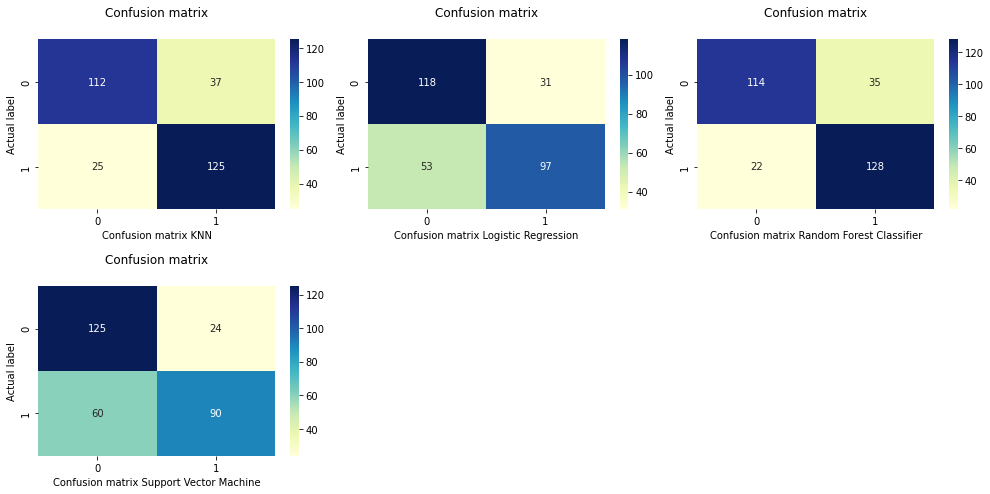

In [67]:
#Plotting Confusion Matrix tunned models

plt.rcParams["figure.figsize"] = (14,10)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap for all models
plt.subplot(3,3,1)
sns.heatmap(pd.DataFrame(bestknn_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Confusion matrix KNN') 

plt.subplot(3,3,2)
sns.heatmap(pd.DataFrame(bestlog_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Confusion matrix Logistic Regression') 

plt.subplot(3,3,3)
sns.heatmap(pd.DataFrame(bestrfc_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Confusion matrix Random Forest Classifier') 

plt.subplot(3,3,4)
sns.heatmap(pd.DataFrame(bestsvc_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Confusion matrix Support Vector Machine') 

plt.tight_layout()

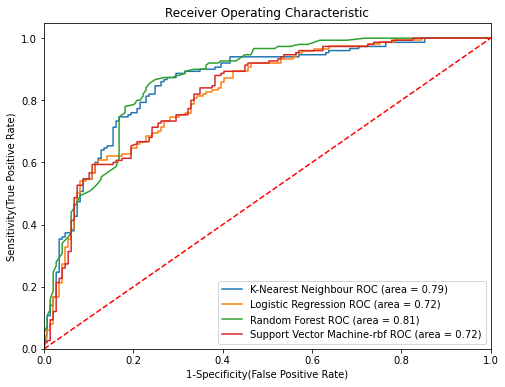

In [69]:
from sklearn import metrics

# Visualisation with plot_metric

models = [{'label': 'K-Nearest Neighbour', 'model': GridSearchCV(knn_model, params_knn, cv = 5),}
          ,{'label': 'Logistic Regression','model': GridSearchCV(log_model, params_log, cv = 5),}
          ,{'label': 'Random Forest','model': GridSearchCV(rfc_model, params_rf, cv = 5),}
          ,{'label': 'Support Vector Machine-rbf','model': GridSearchCV(svc_model, params_svc, scoring = 'accuracy', cv = 5, n_jobs = -1),}]


for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    roc_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.rcParams["figure.figsize"] = (8,6)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

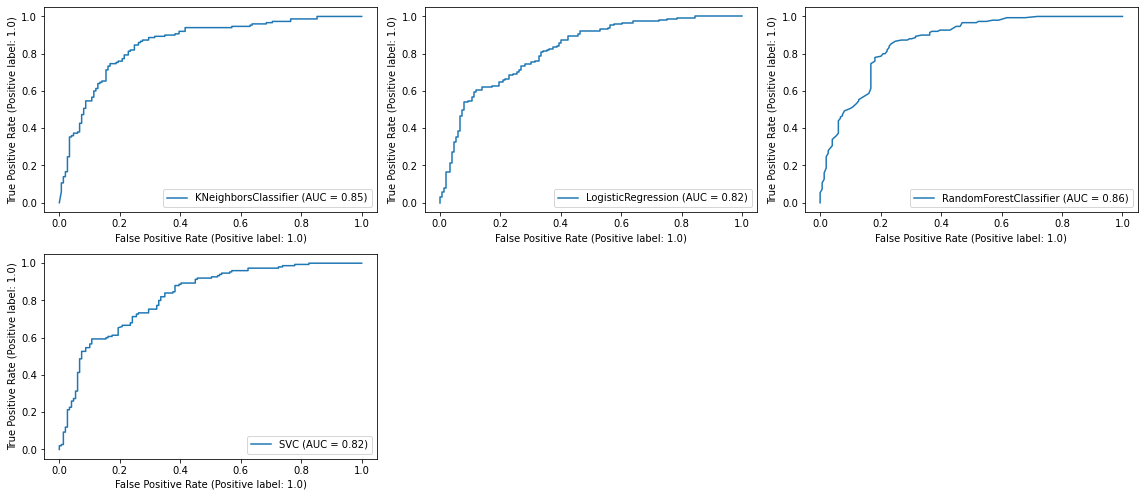

In [70]:
#visualisation w/ Auc Tunned models

from sklearn.metrics import plot_roc_curve

plt.figure(figsize=[16,10])
ax1 = plt.subplot(3,3,1)
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)
ax4 = plt.subplot(3,3,4)

plot_roc_curve(knn_best, X_test, y_test, ax=ax1)
plot_roc_curve(log_best, X_test, y_test, ax=ax2)
plot_roc_curve(rf_best, X_test, y_test, ax=ax3)
plot_roc_curve(svc_best, X_test, y_test, ax=ax4)

plt.tight_layout()

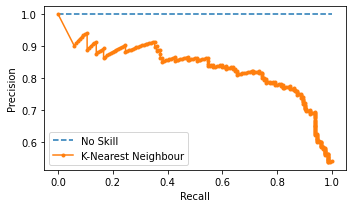

In [71]:
#Precision-recall Curve for KNN


from sklearn.metrics import precision_recall_curve

k_precision, k_recall, _ = precision_recall_curve(y_test, bestknn_prob)
no_skill = len(y_test[y_test==1]) / len(y_test)



plt.subplots(figsize=(5, 3))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(k_recall, k_precision, marker='.', label='K-Nearest Neighbour')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.tight_layout()

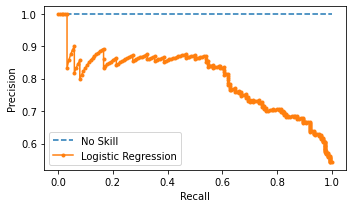

In [72]:
#Precision-recall Curve for Logistic Regression

l_precision, l_recall, _ = precision_recall_curve(y_test, bestlog_prob)
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.subplots(figsize=(5, 3))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(l_recall, l_precision, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.tight_layout()

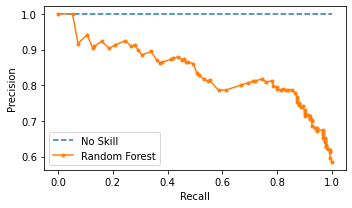

In [73]:
#Precision-recall Curve for Random Forest

r_precision, r_recall, _ = precision_recall_curve(y_test, bestrf_prob)
no_skill = len(y_test[y_test==1]) / len(y_test)


plt.subplots(figsize=(5, 3))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(r_recall, r_precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.tight_layout()

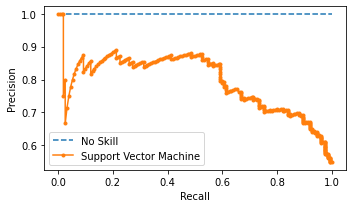

In [74]:
#Precision-recall Curve for Support Vector Machine

s_precision, s_recall, _ = precision_recall_curve(y_test, bestsvc_prob)
no_skill = len(y_test[y_test==1]) / len(y_test)



plt.subplots(figsize=(5, 3))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(s_recall, s_precision, marker='.', label='Support Vector Machine')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.tight_layout()

In [75]:
# Voting Classifier w/best parameters hold out method tunned models

from sklearn.ensemble import VotingClassifier


#inputting best parameters models - Hard
best_estimators0 = [('knn_model', knn_best), ('rf_model', rf_best), ('log_model', log_best), ('svc_model', svc_best)]


ensemble0 = VotingClassifier(best_estimators0, voting = "hard")

#fitting model to training data
ensemble0.fit(X_train, y_train)
hard_model = ensemble0.score(X_test, y_test)
hard_pred = ensemble0.predict(X_test)


#inputting best parameters models - Soft
best_estimators190 = [('knn_model', knn_best), ('rf_model', rf_best), ('log_model', log_best), ('svc_model', svc_best)]

#fitting model to training data
ensemble60 = VotingClassifier(best_estimators190, voting = "soft")
ensemble60.fit(X_train, y_train)
soft_model = ensemble60.score(X_test, y_test)
sof_pred = ensemble60.predict(X_test)


print("Hold-out - Hard Voting Classifier Accuracy: {:.2f} %".format(hard_model))
print("Hold-out - Soft Voting Classifier Accuracy: {:.2f} %".format(soft_model))

Hold-out - Hard Voting Classifier Accuracy: 0.73 %
Hold-out - Soft Voting Classifier Accuracy: 0.79 %


In [76]:
#Voting Classifier k-fold method tunned models
from sklearn.model_selection import cross_val_predict

votingcf =StratifiedKFold(n_splits=10)

k_estimators1 = []

k_estimators1.append(('knn_model', knn_best))
k_estimators1.append(('rf_model', rf_best))
k_estimators1.append(('log_model', log_best))
k_estimators1.append(('svc_model', svc_best))

# creating the ensemble model for Hard voting 
ensemble7 = VotingClassifier(k_estimators1, voting = "hard")
ttrain_hardcv = cross_val_score(ensemble7, X_train, y_train, cv=votingcf, scoring='accuracy')
cvhard_pred = cross_val_predict(ensemble7, X_test, y_test)
ttrain_hardcv = ttrain_hardcv.mean()
print("K-fold - Hard Voting Classifier Accuracy dataset: {:.2f} %".format(ttrain_hardcv))


# creating the ensemble model for soft voting 
ensemble9 = VotingClassifier(k_estimators1, voting = "soft")
ttrain_softcv = cross_val_score(ensemble9, X_train, y_train, cv=votingcf, scoring='accuracy')
cvsoft_pred = cross_val_predict(ensemble9, X_test, y_test)
ttrain_softcv = ttrain_softcv.mean()
print("K-fold - Soft Voting Classifier Accuracy dataset: {:.2f} %".format(ttrain_softcv))

K-fold - Hard Voting Classifier Accuracy dataset: 0.74 %
K-fold - Soft Voting Classifier Accuracy dataset: 0.79 %


In [77]:
# Accuracy score voting Classifiers tunned models

holdhard_score = accuracy_score(y_test, hard_pred)
holdsoft_score = accuracy_score(y_test, sof_pred)

cvhard_score = accuracy_score(y_test, cvhard_pred)
cvsoft_score = accuracy_score(y_test, cvsoft_pred)


print("Hard Voting Accuracy score (Hold-out): {:.2f} %".format(holdhard_score))
print("Hard Voting Accuracy score (Hold-out):{:.2f} %".format(holdsoft_score))
print()
print("Soft Voting Accuracy score (K-fold): {:.2f} %".format(cvhard_score))
print("Soft Voting Accuracy score (K-fold):{:.2f} %".format(cvsoft_score))

Hard Voting Accuracy score (Hold-out): 0.73 %
Hard Voting Accuracy score (Hold-out):0.79 %

Soft Voting Accuracy score (K-fold): 0.75 %
Soft Voting Accuracy score (K-fold):0.76 %


In [78]:
# Confusion matrix - Voting Classifiers tunned

from sklearn import metrics
holdhard_matrix = metrics.confusion_matrix(y_test, hard_pred)
holdsoft_matrix = metrics.confusion_matrix(y_test, sof_pred)
cvhard_matrix = metrics.confusion_matrix(y_test, cvhard_pred)
cvsoft_matrix = metrics.confusion_matrix(y_test, cvsoft_pred)

In [80]:
# Classification Report Voting Classifiers w/ best parameters
from sklearn.metrics import classification_report

print("Classification report Voting Classifier Hard (hold-out): \n " , classification_report(y_test, hard_pred)) 
print()
print("Classification report Voting Classifier Soft (hold-out): \n " ,classification_report(y_test, sof_pred)) 
print()
print("Classification report Voting Classifier Hard (K-fold): \n " ,classification_report(y_test, cvhard_pred)) 
print()
print("Classification report Voting Classifier Soft (K-fold): \n " ,classification_report(y_test, cvsoft_pred)) 

Classification report Voting Classifier Hard (hold-out): 
                precision    recall  f1-score   support

         0.0       0.69      0.84      0.76       149
         1.0       0.79      0.62      0.70       150

    accuracy                           0.73       299
   macro avg       0.74      0.73      0.73       299
weighted avg       0.74      0.73      0.73       299


Classification report Voting Classifier Soft (hold-out): 
                precision    recall  f1-score   support

         0.0       0.79      0.77      0.78       149
         1.0       0.78      0.80      0.79       150

    accuracy                           0.79       299
   macro avg       0.79      0.79      0.79       299
weighted avg       0.79      0.79      0.79       299


Classification report Voting Classifier Hard (K-fold): 
                precision    recall  f1-score   support

         0.0       0.73      0.79      0.76       149
         1.0       0.77      0.71      0.74       150

  

In [81]:
#applying Gridsearch on Voting Classifier hold out hold out

eclf = VotingClassifier(estimators=[('knn_model', KNeighborsClassifier()), 
              ('rf_model', RandomForestClassifier()), 
              ('log_model', LogisticRegression()), 
              ('svc_model', SVC(probability=True))], voting='soft')

#create our voting classifier, inputting our models


paramsrf = {'voting':['hard', 'soft'],
          'weights':[(1,1,1,1), (2,1,1,1), (1,2,1,1), (1,1,2,1), (1,1,1,2)]}


vot_classif_grid = GridSearchCV(estimator=eclf, param_grid=paramsrf,cv=5)
vot_classif_grid.fit(X_train,y_train)

print('Train Accuracy : %.3f'%vot_classif_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%vot_classif_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%vot_classif_grid.best_score_)
print('Best Parameters : ',vot_classif_grid.best_params_)


Train Accuracy : 0.910
Test Accuracy : 0.793
Best Accuracy Through Grid Search : 0.785
Best Parameters :  {'voting': 'hard', 'weights': (1, 2, 1, 1)}


In [ ]:
#applying Gridsearch on Voting Classifier k-fold best parameters 

kfgrid =StratifiedKFold(n_splits=10)

eclf_cv = VotingClassifier(estimators=[('knn_model', KNeighborsClassifier()), 
              ('rf_model', RandomForestClassifier()), 
              ('log_model', LogisticRegression()), 
              ('svc_model', SVC(probability=True))], voting='soft')

#create our voting classifier, inputting our models


paramsr = {'voting':['hard', 'soft'],
          'weights':[(1,1,1,1), (2,1,1,1), (1,2,1,1), (1,1,2,1), (1,1,1,2)]}


cv_classif_grid = GridSearchCV(estimator=eclf_cv, param_grid=paramsr,cv=5)
grid_cvtrain = cross_val_score(cv_classif_grid, X_train, y_train, cv=kfgrid, scoring='accuracy')
grid_cvtest = cross_val_score(cv_classif_grid, X_test, y_test, cv=kfgrid, scoring='accuracy')

print('Train Accuracy k-fold', grid_cvtrain.mean()*100)
print('Test Accuracy k-fold', grid_cvtest.mean()*100)

In [100]:

print("Classification report Voting Classifier Hard (hold-out): \n " , classification_report(y_test, Final_pred)) 

Classification report Voting Classifier Hard (hold-out): 
                precision    recall  f1-score   support

         0.0       0.81      0.77      0.79       149
         1.0       0.78      0.82      0.80       150

    accuracy                           0.79       299
   macro avg       0.79      0.79      0.79       299
weighted avg       0.79      0.79      0.79       299



In [99]:
Final_pred = vot_classif_grid.predict(X_test)
final_best = vot_classif_grid.best_estimator_


In [86]:
# Confusion matrix - best Voting Classifiers tunned

from sklearn import metrics
holdhard_matrix = metrics.confusion_matrix(y_test, Final_pred)


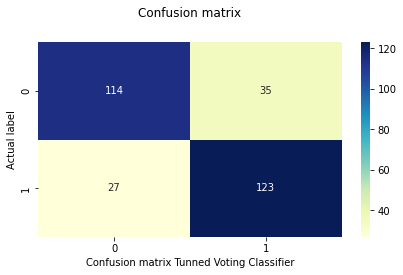

In [101]:
#Confusion Matrix - best Voting Classifiers tunned

plt.rcParams["figure.figsize"] = (6,4)

sns.heatmap(pd.DataFrame(holdhard_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Confusion matrix Tunned Voting Classifier') 



plt.tight_layout()